In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset=pd.read_csv('heart.csv')

In [4]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
dataset.shape

(303, 14)

In [43]:
dummy_feature=['sex','cp','fbs','restecg','exang','slope','ca','thal']
scale_features=['age','trestbps','chol','thalach','oldpeak']

In [11]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [13]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<AxesSubplot:>

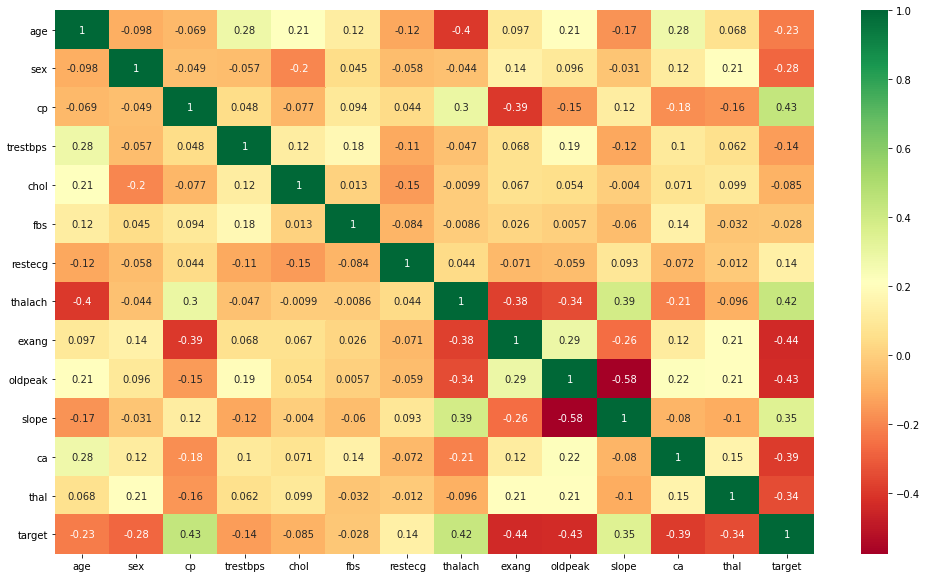

In [18]:
plt.figure(figsize=(17,10))
sns.heatmap(dataset.corr(),annot=True,cmap='RdYlGn')

<AxesSubplot:xlabel='target', ylabel='count'>

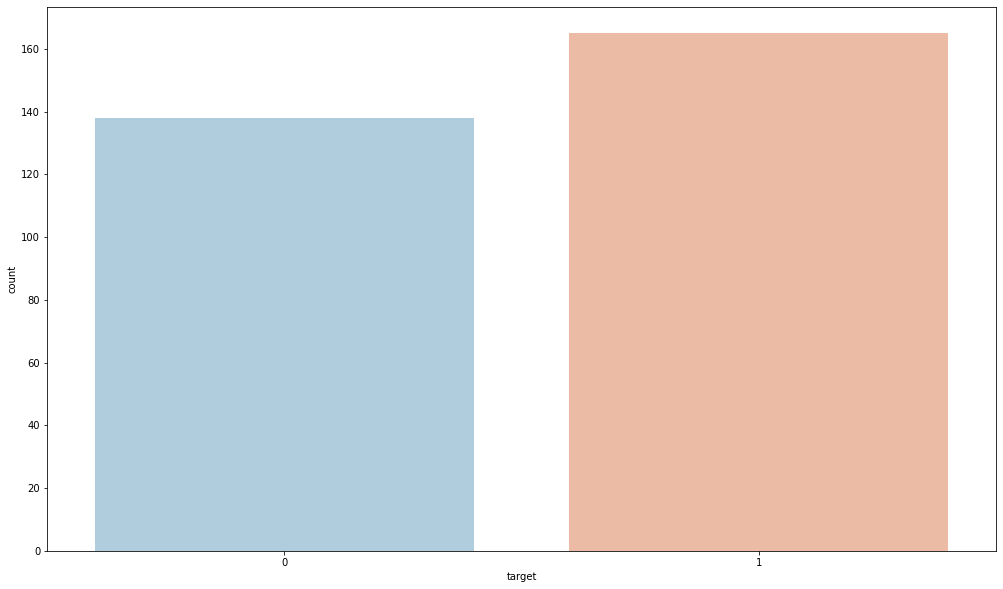

In [27]:
plt.figure(figsize=(17,10))
sns.countplot(x='target',data=dataset,palette='RdBu_r')

In [40]:
dataset=pd.get_dummies(dataset,columns=dummy_feature)

In [44]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
dataset[scale_features]=scaler.fit_transform(dataset[scale_features])

In [45]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [48]:
x=dataset.drop('target',axis=1)
y=dataset['target']

In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [51]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [52]:
knn_score=[]
for i in range(1,20):
    knn_model=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn_model,x_train,y_train,cv=10)
    knn_score.append(score.mean())

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

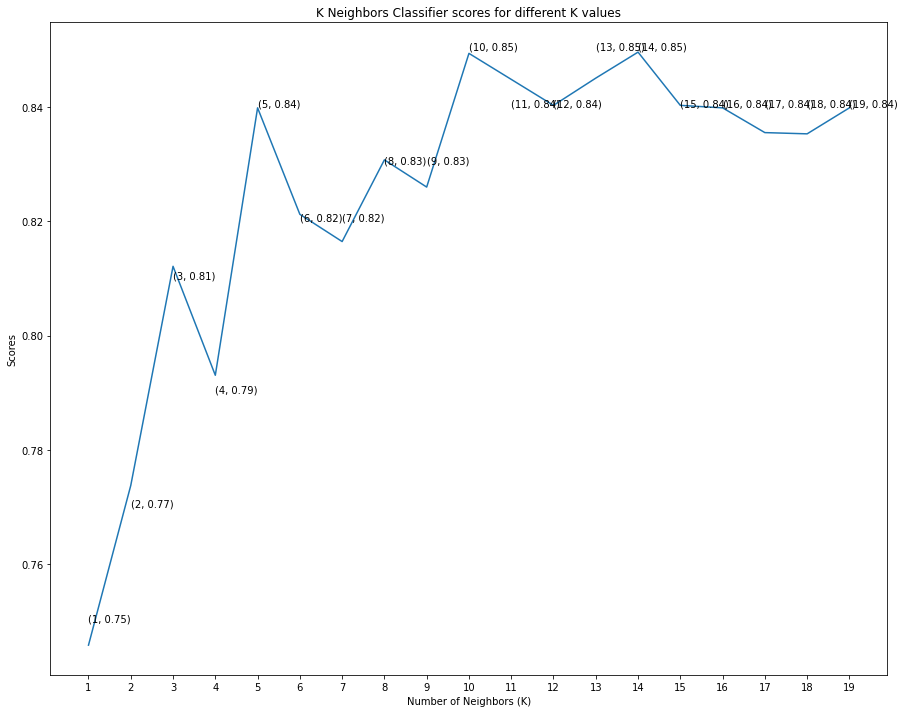

In [60]:
plt.figure(figsize=(15,12))
plt.plot(range(1,20),knn_score)
for i in range(1,20):
    plt.text(i, np.round(knn_score[i-1],2), (i, np.round(knn_score[i-1],2)))
plt.xticks([i for i in range(1, 20)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [61]:
knn_model=KNeighborsClassifier(n_neighbors=10)
score=cross_val_score(knn_model,x_train,y_train,cv=10)

In [62]:
score.mean()

0.8493506493506494

In [66]:
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

[Text(404.8532608695652, 516.4200000000001, 'X[28] <= 0.5\ngini = 0.494\nsamples = 212\nvalue = [94, 118]'),
 Text(181.95652173913044, 462.06000000000006, 'X[7] <= 0.5\ngini = 0.364\nsamples = 96\nvalue = [73, 23]'),
 Text(90.97826086956522, 407.70000000000005, 'X[20] <= 0.5\ngini = 0.495\nsamples = 29\nvalue = [13, 16]'),
 Text(36.391304347826086, 353.34000000000003, 'X[3] <= -0.291\ngini = 0.48\nsamples = 20\nvalue = [12, 8]'),
 Text(18.195652173913043, 298.98, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(54.586956521739125, 298.98, 'X[0] <= -0.482\ngini = 0.49\nsamples = 14\nvalue = [6, 8]'),
 Text(36.391304347826086, 244.62, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(72.78260869565217, 244.62, 'X[0] <= 1.448\ngini = 0.444\nsamples = 12\nvalue = [4, 8]'),
 Text(54.586956521739125, 190.26000000000005, 'X[22] <= 0.5\ngini = 0.32\nsamples = 10\nvalue = [2, 8]'),
 Text(36.391304347826086, 135.90000000000003, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(72.78260869565217

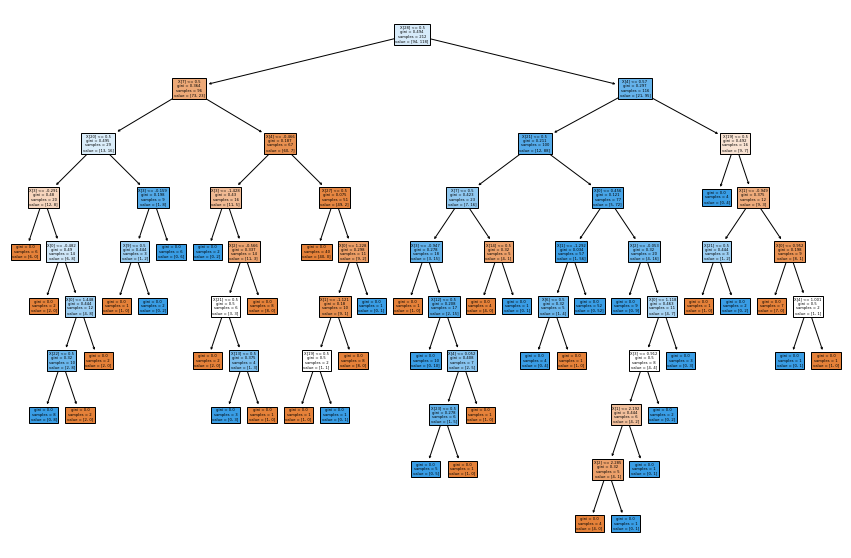

In [67]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dt_model,filled=True)

In [68]:
path=dt_model.cost_complexity_pruning_path(x_train,y_train)

In [71]:
ccp_alpha=path.ccp_alphas

In [73]:
dt_models=[]
for alpha in ccp_alpha:
    dt_model=DecisionTreeClassifier(ccp_alpha=alpha)
    dt_model.fit(x_train,y_train)
    dt_models.append(dt_model)

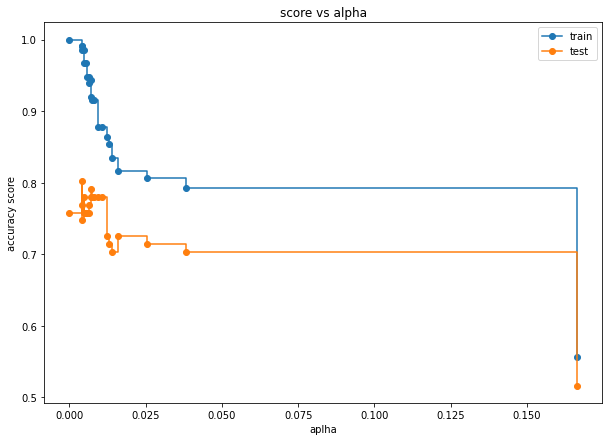

In [75]:
train_score=[dtc.score(x_train,y_train) for dtc in dt_models]
test_score=[dtc.score(x_test,y_test) for dtc in dt_models]
plt.figure(figsize=(10,7))
plt.xlabel('aplha')
plt.ylabel('accuracy score')
plt.title('score vs alpha')
plt.plot(ccp_alpha,train_score,marker='o', label="train",
        drawstyle="steps-post")
plt.plot(ccp_alpha,test_score,marker='o', label="test",
        drawstyle="steps-post")
plt.legend()

In [79]:
dt_model=DecisionTreeClassifier(ccp_alpha=0.025)
dt_model.fit(x_train,y_train)
score=cross_val_score(dt_model,x_train,y_train)
score.mean()

0.7498338870431894

[Text(418.5, 453.0, 'X[28] <= 0.5\ngini = 0.494\nsamples = 212\nvalue = [94, 118]'),
 Text(209.25, 271.8, 'X[7] <= 0.5\ngini = 0.364\nsamples = 96\nvalue = [73, 23]'),
 Text(104.625, 90.59999999999997, 'gini = 0.495\nsamples = 29\nvalue = [13, 16]'),
 Text(313.875, 90.59999999999997, 'gini = 0.187\nsamples = 67\nvalue = [60, 7]'),
 Text(627.75, 271.8, 'X[4] <= 0.57\ngini = 0.297\nsamples = 116\nvalue = [21, 95]'),
 Text(523.125, 90.59999999999997, 'gini = 0.211\nsamples = 100\nvalue = [12, 88]'),
 Text(732.375, 90.59999999999997, 'gini = 0.492\nsamples = 16\nvalue = [9, 7]')]

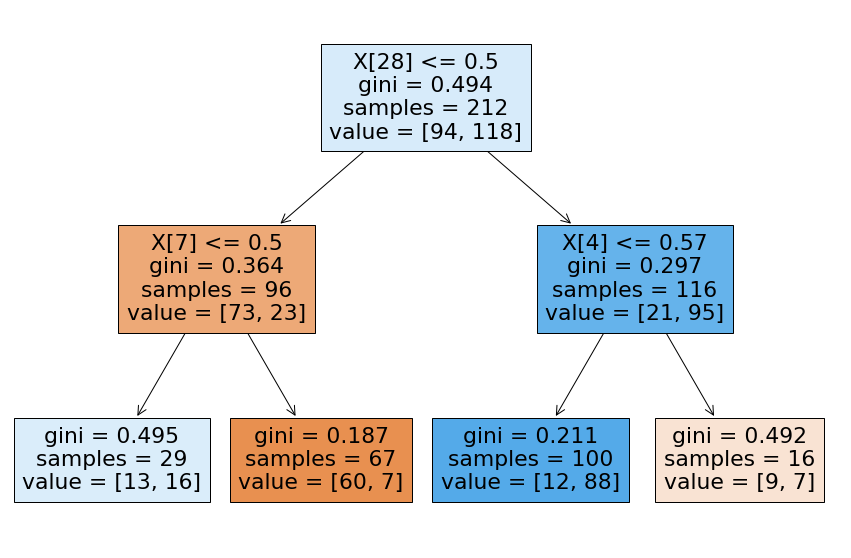

In [80]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dt_model,filled=True)

In [85]:
rf_score=[]
for i in range(1,20):
    rf_model=RandomForestClassifier(n_estimators=i)
    score=cross_val_score(rf_model,x_train,y_train,cv=10)
    rf_score.append(score.mean())

Text(0.5, 1.0, 'random forest Classifier scores for different n values')

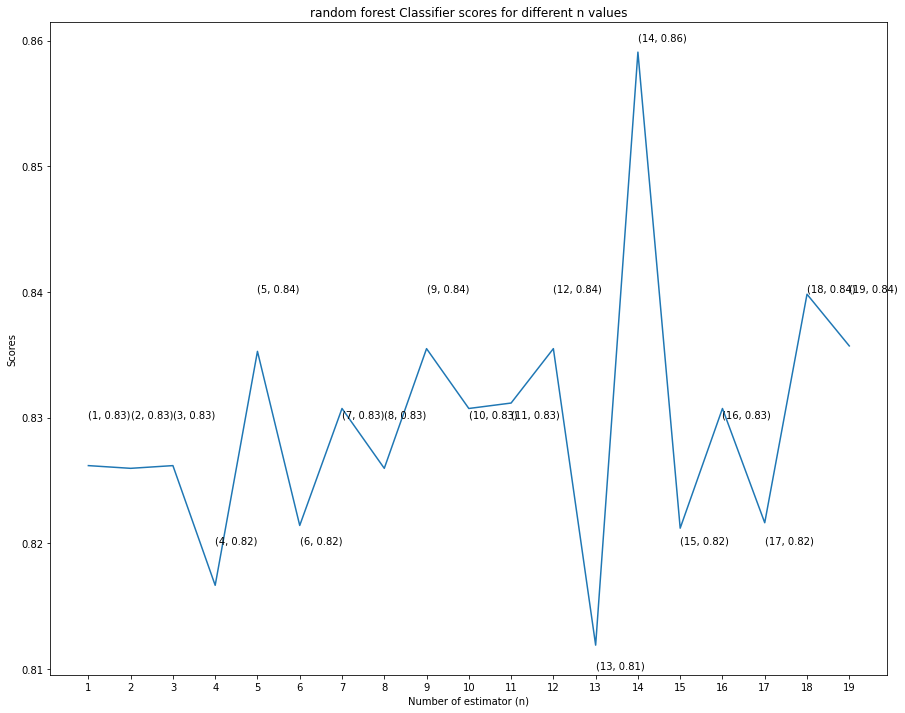

In [87]:
plt.figure(figsize=(15,12))
plt.plot(range(1,20),rf_score)
for i in range(1,20):
    plt.text(i, np.round(rf_score[i-1],2), (i, np.round(rf_score[i-1],2)))
plt.xticks([i for i in range(1, 20)])
plt.xlabel('Number of estimator (n)')
plt.ylabel('Scores')
plt.title('random forest Classifier scores for different n values')

In [88]:
rf_model=RandomForestClassifier(n_estimators=12)
score=cross_val_score(rf_model,x_train,y_train,cv=10)
score.mean()

0.8067099567099566